# Exploratory Data Analysis

### Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import plotly.express as px 
import tkinter 
import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_val_score 
from collections import Counter

### Import Data

In [2]:
# training data
train_values = pd.read_csv('data/train_values.csv')
train_labels = pd.read_csv('data/train_labels.csv')

# testing data
test_values = pd.read_csv('data/test_values.csv')

### Data Set Characteristics and Attributes

The data was downloaded from the Driven Data competition.

### Exploring the Train and Test Data Sets

In [3]:
train_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [4]:
test_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86868 entries, 0 to 86867
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   building_id                             86868 non-null  int64 
 1   geo_level_1_id                          86868 non-null  int64 
 2   geo_level_2_id                          86868 non-null  int64 
 3   geo_level_3_id                          86868 non-null  int64 
 4   count_floors_pre_eq                     86868 non-null  int64 
 5   age                                     86868 non-null  int64 
 6   area_percentage                         86868 non-null  int64 
 7   height_percentage                       86868 non-null  int64 
 8   land_surface_condition                  86868 non-null  object
 9   foundation_type                         86868 non-null  object
 10  roof_type                               86868 non-null  object
 11  gr

Overview of the Train Data

In [5]:
train_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [12]:
train_values.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Overview of the Test Data

In [13]:
test_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,...,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,...,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,...,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,...,0,0,0,0,0,0,0,0,0,0


In [11]:
test_values.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,8.686800e+04,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,...,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000,86868.000000
mean,5.266279e+05,13.888198,704.128125,6261.758565,2.133145,26.550168,8.013906,5.436098,0.089953,0.762502,...,0.064097,0.033867,0.008242,0.001013,0.000368,0.001002,0.000104,0.000115,0.000046,0.004904
std,3.037828e+05,8.029576,413.364015,3648.712191,0.728047,73.413489,4.377899,1.906950,0.286115,0.425552,...,0.244928,0.180889,0.090413,0.031812,0.019190,0.031631,0.010178,0.010729,0.006786,0.069857
min,7.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.644215e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.269835e+05,12.000000,709.000000,6276.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.890842e+05,21.000000,1054.000000,9416.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.052923e+06,30.000000,1427.000000,12567.000000,8.000000,995.000000,92.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Feature Distribution

In [20]:
numeric_df = train_values.select_dtypes(include=[int, float])

numeric_columns = numeric_df.columns

/var/folders/lz/681wf9cs2tvdwgsjstdnlkmc0000gn/T/ipykernel_32975/2928576585.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


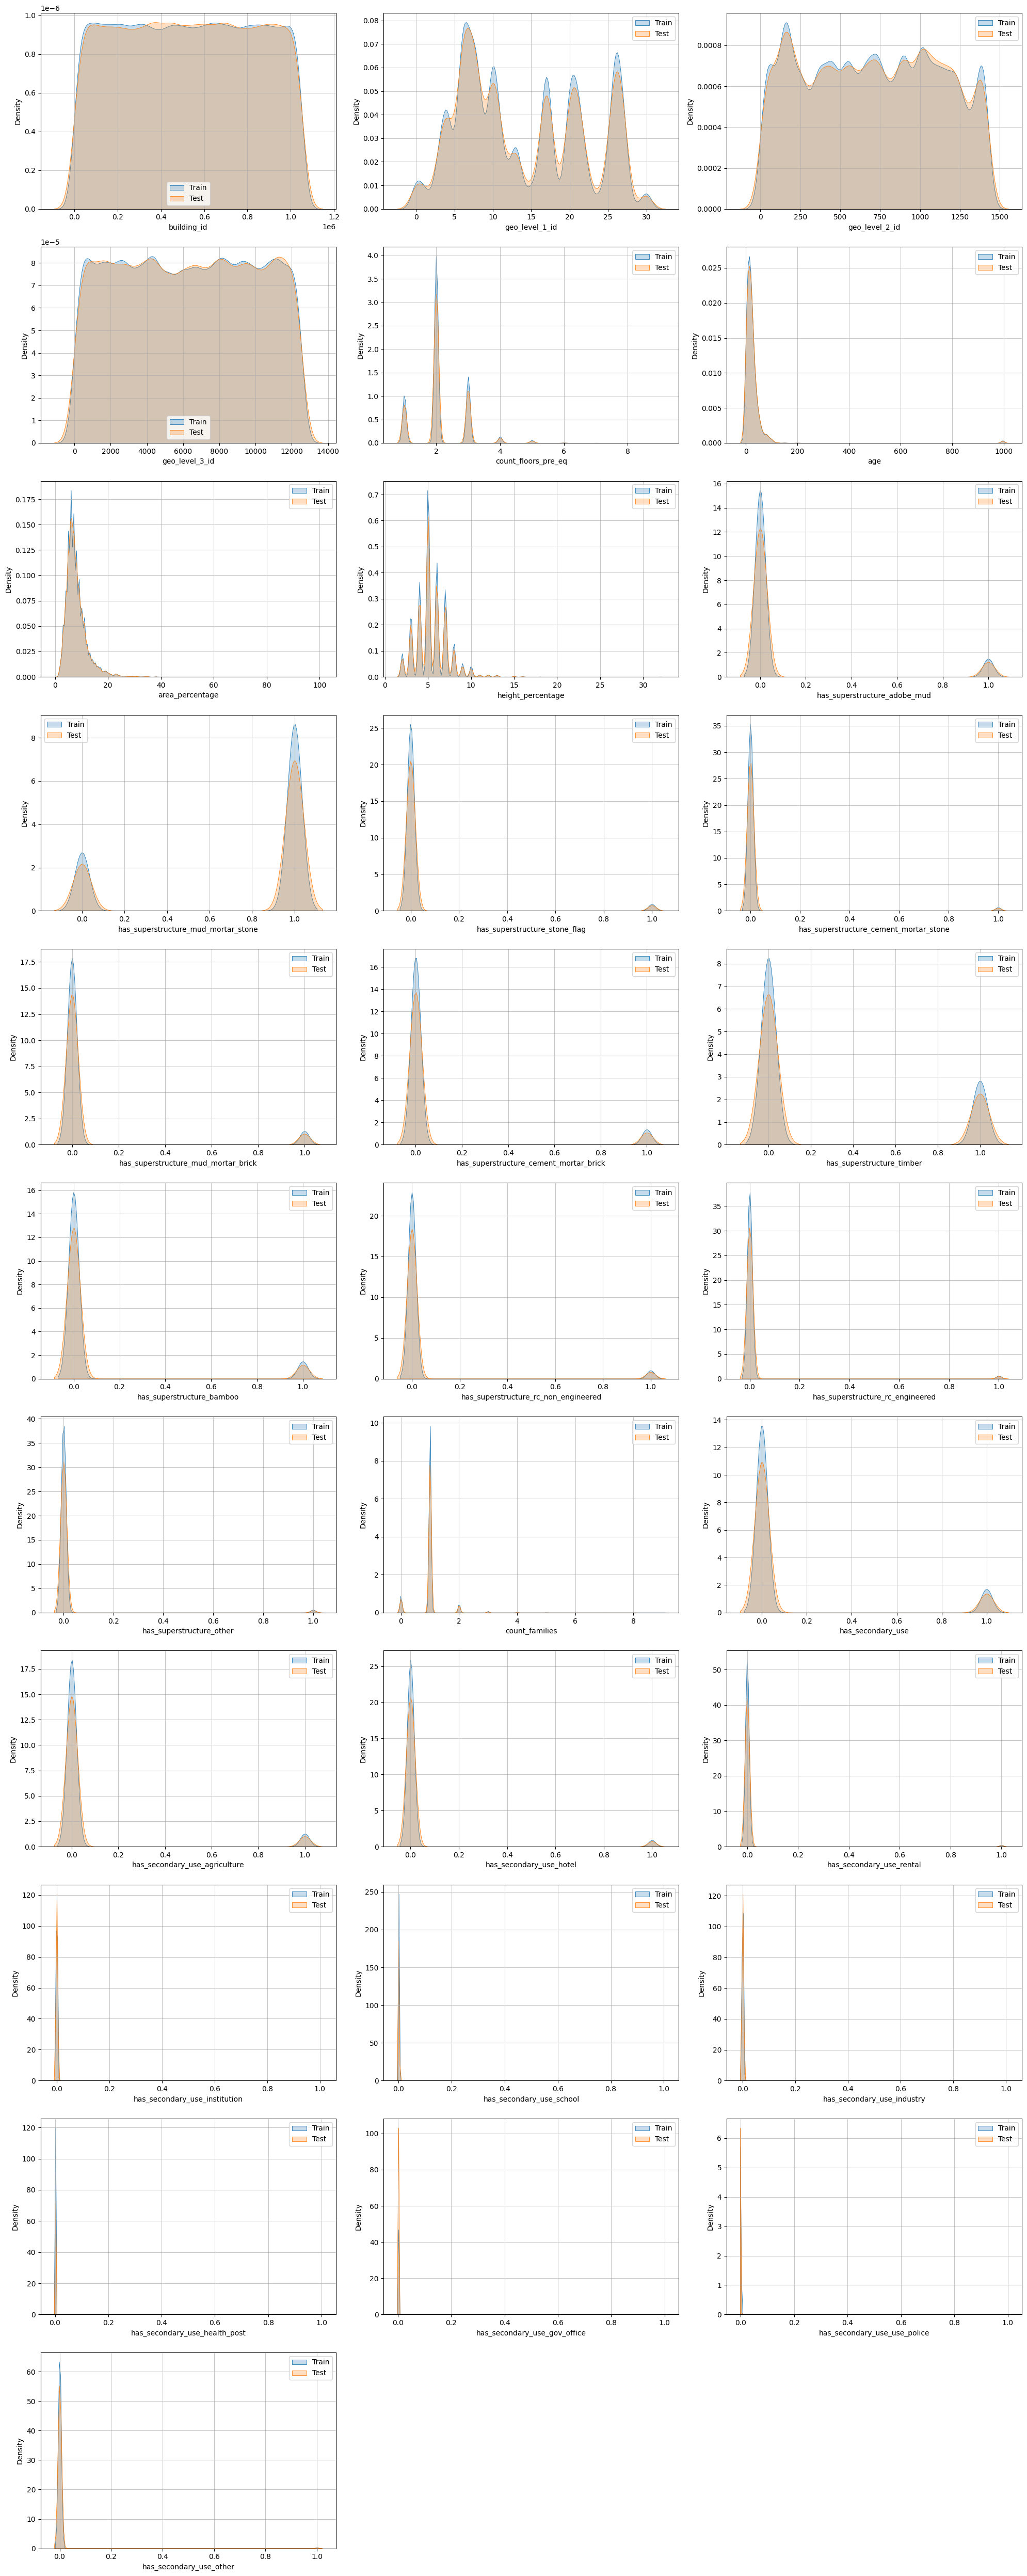

In [22]:
fig = plt.figure(figsize=(20, 50))

rows, cols = 11, 3

for idx, num in enumerate(numeric_columns):
    ax = fig.add_subplot(rows, cols, idx + 1)
    ax.grid(alpha = 0.7, axis='both')
    sns.kdeplot(x = num, fill = True, linewidth = 0.6, data = train_values, label = 'Train')
    sns.kdeplot(x = num, fill = True, linewidth = 0.6, data = test_values, label = 'Test')
    ax.set_xlabel(num)
    ax.legend()

fig.tight_layout()
fig.show()


The distribution of the numeric features seems to be similar in both training and testing data, so we don't have to remove any features yet. However, it seems most binary variables are very imbalanced, with most observations with 0. Thus, some features may provide no useful information for the classification problem, as nearly all observations are 0.

### Class Imbalance Check

In [38]:
class_count = list(train_labels['damage_grade'].value_counts().sort_values())
pie_values = [class_count[0] / sum(class_count) * 100, class_count[1] / sum(class_count) * 100, class_count[2] / sum(class_count) * 100]

In [41]:
class_count

[25124, 87218, 148259]

In [40]:
train_labels['damage_grade'].value_counts().sort_values()

damage_grade
1     25124
3     87218
2    148259
Name: count, dtype: int64

/var/folders/lz/681wf9cs2tvdwgsjstdnlkmc0000gn/T/ipykernel_32975/4225128679.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = train_labels,
/var/folders/lz/681wf9cs2tvdwgsjstdnlkmc0000gn/T/ipykernel_32975/4225128679.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No Damage', 'Almost Destroyed', 'Some Damage'])


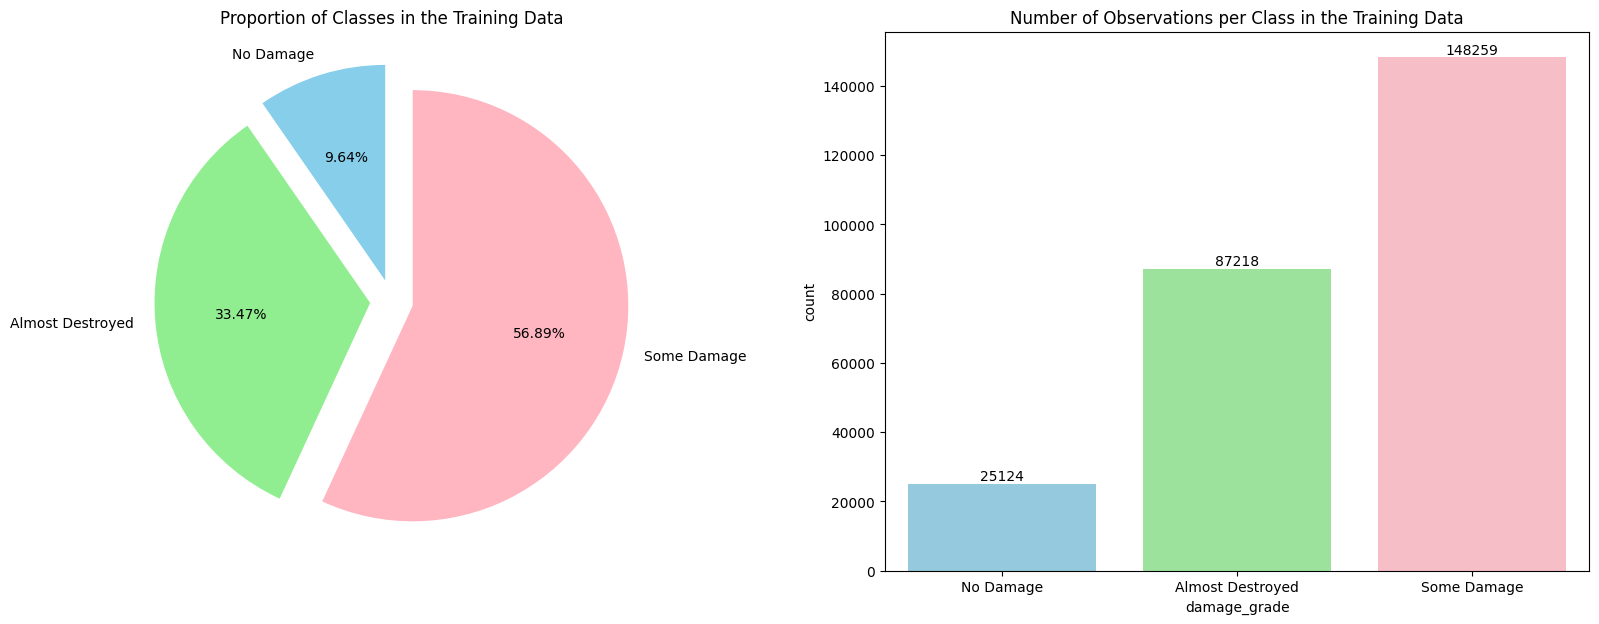

In [49]:
palette = ["#87CEEB", "#90EE90", "#FFB6C1"]

fig = plt.subplots(nrows = 1, ncols = 2, figsize=(20, 7))

plt.subplot(1, 2, 1)

plt.pie(pie_values, labels = ['No Damage', 'Almost Destroyed', 'Some Damage'],
        autopct = '%1.2f%%',
        startangle = 90,
        explode = (0.1, 0.1, 0.1),
        colors = palette)

plt.title('Proportion of Classes in the Training Data')

plt.subplot(1, 2, 2)

ax = sns.countplot(data = train_labels,
                   x = 'damage_grade',
                   palette = palette,
                   order = train_labels['damage_grade'].value_counts().sort_values().index)

for i in ax.containers:
    ax.bar_label(i, )

ax.set_xticklabels(['No Damage', 'Almost Destroyed', 'Some Damage'])

plt.title('Number of Observations per Class in the Training Data')

plt.show()

### Checking for Outliers

In [53]:
def boxplot_custom(dataset, col_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey = True, figsize = (16, 25))
    fig.suptitle(suptitle, y = 1, size = 25)
    axs = axs.flatten()
    for i, data in enumerate(col_list):
        sns.boxplot(data = dataset[data], orient = 'h', ax = axs[i])
        axs[i].set_title(data + ', skewness is:' + str(round(dataset[data].skew(axis = 0, skipna = True), 2)))

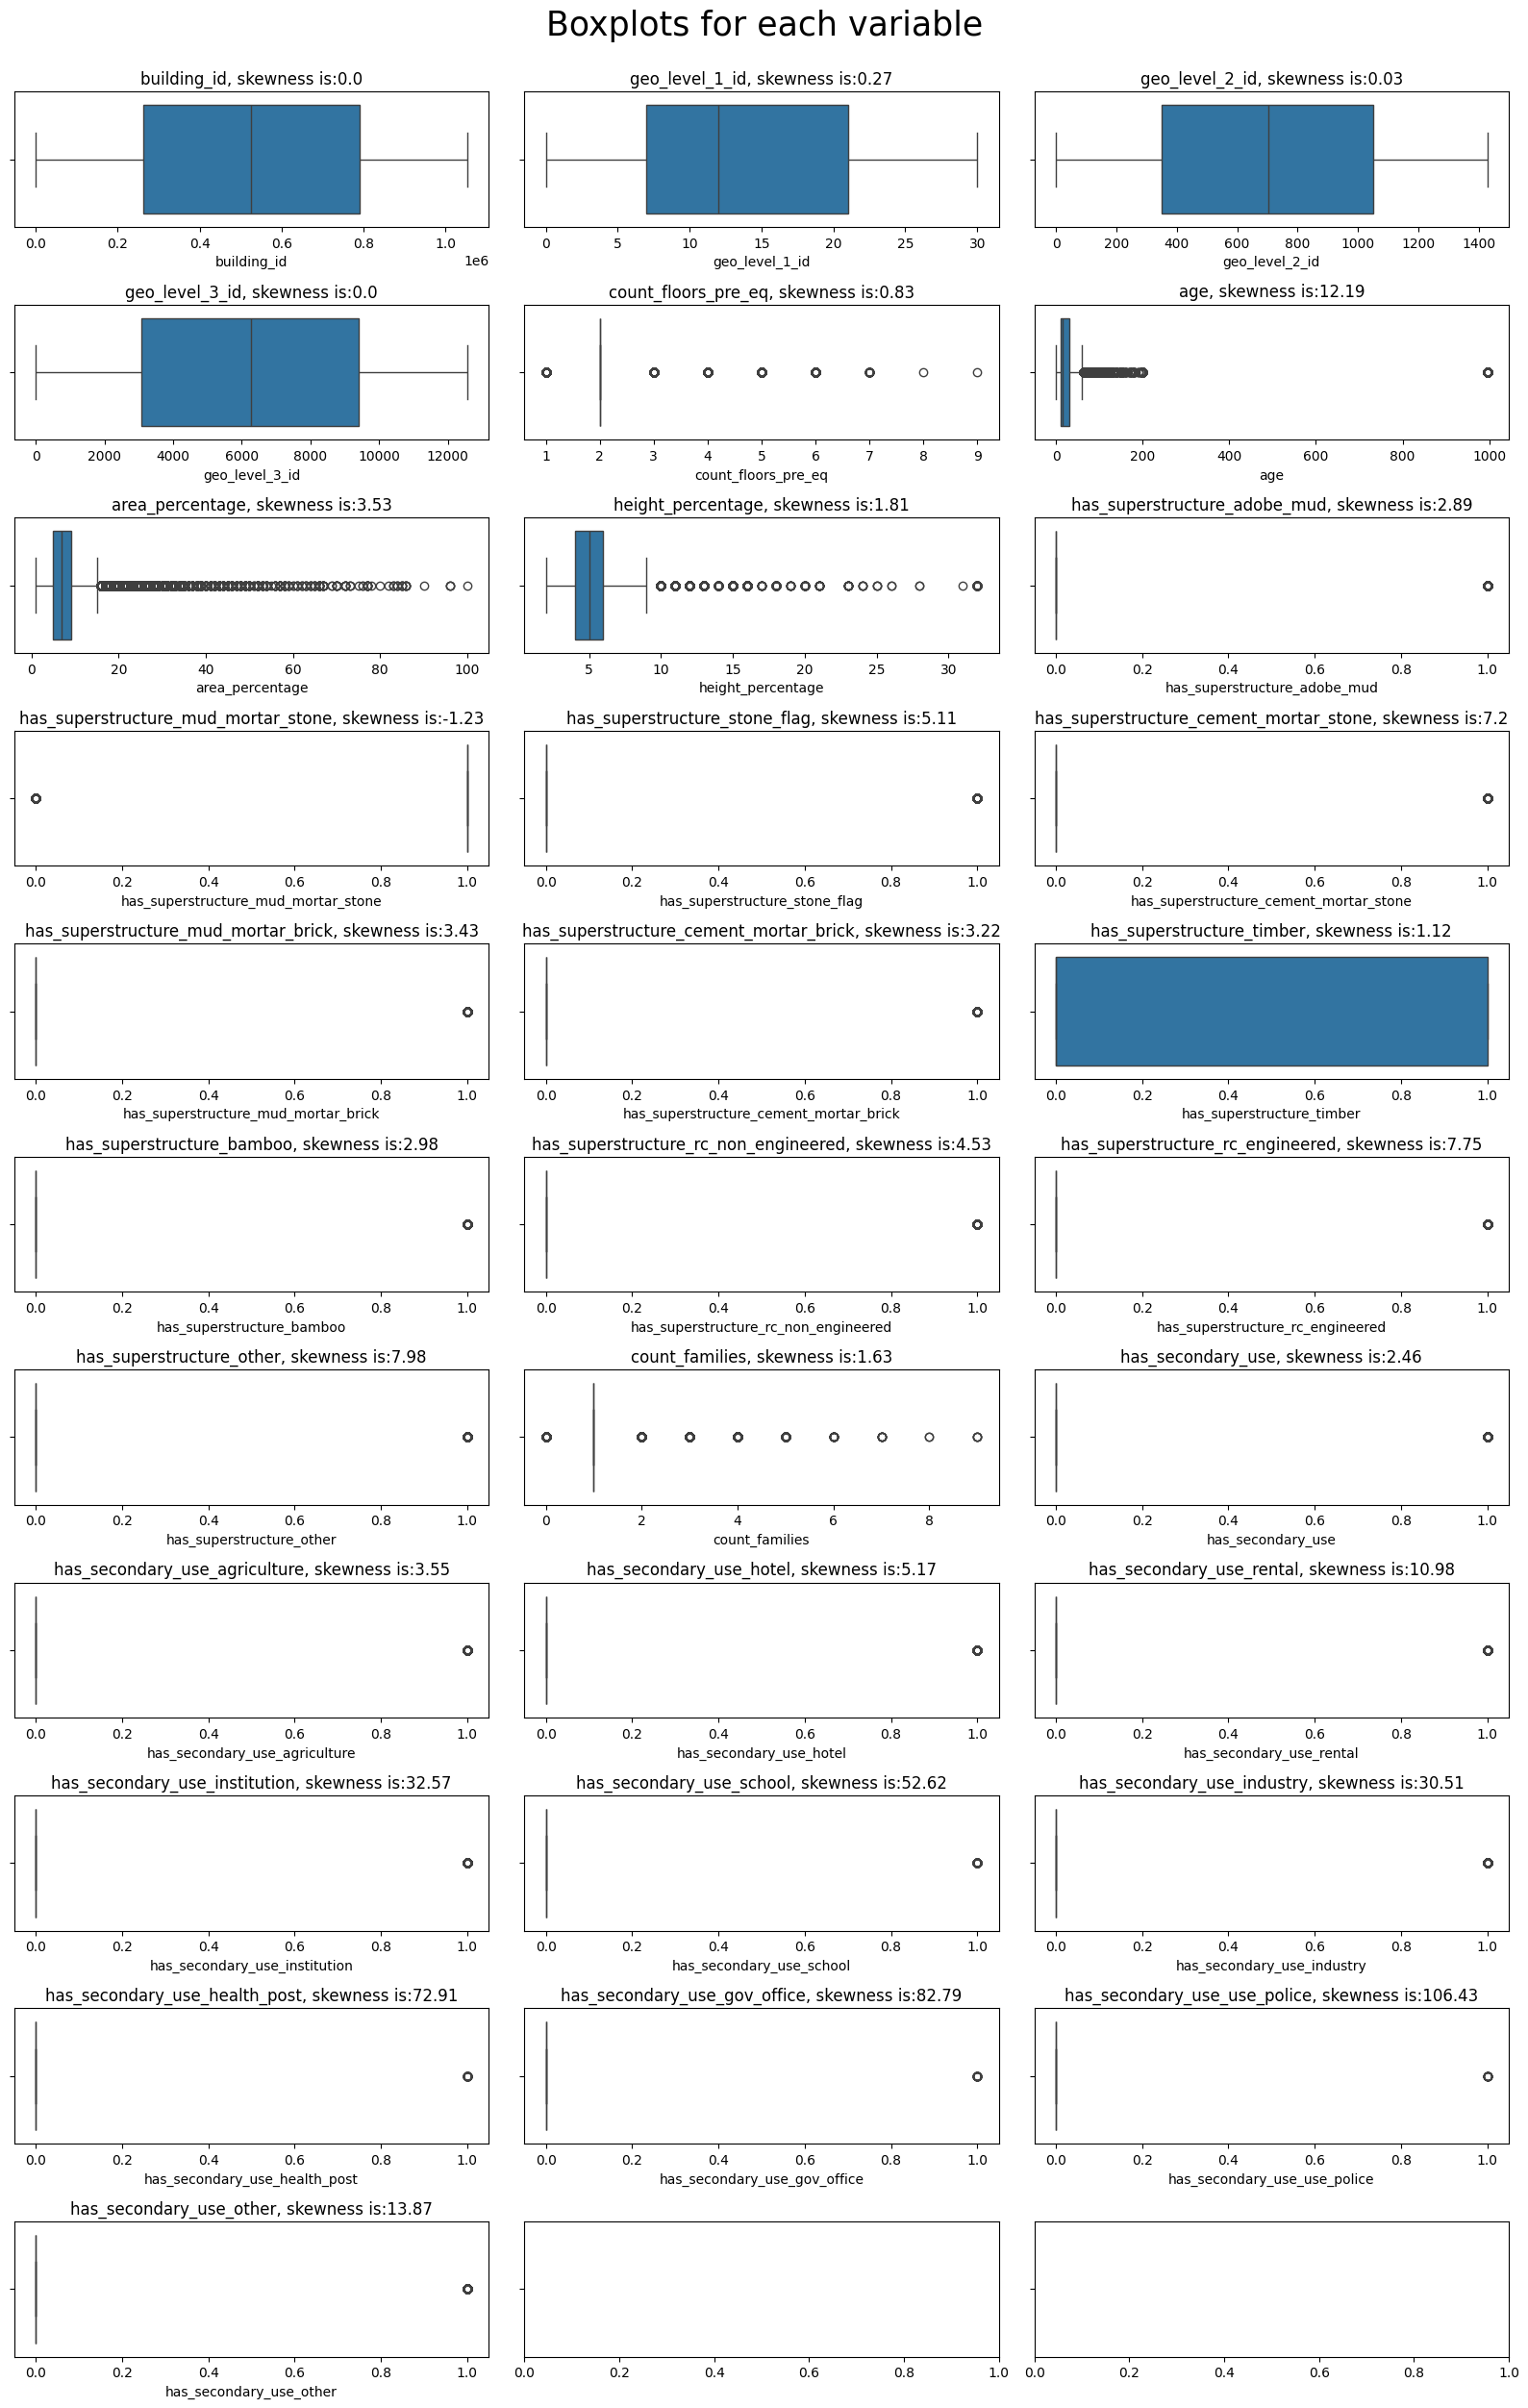

In [54]:
boxplot_custom(dataset = train_values, col_list = numeric_columns, rows = 11, cols = 3, suptitle = 'Boxplots for each variable')
plt.tight_layout()

There seems to be a lot of outliers, but it's not a good idea to remove them since we'd be deleting a lot of important observations from our dataset.

### Checking for Duplicated Values

In [55]:
train_values.duplicated().sum()

np.int64(0)

### Correlations

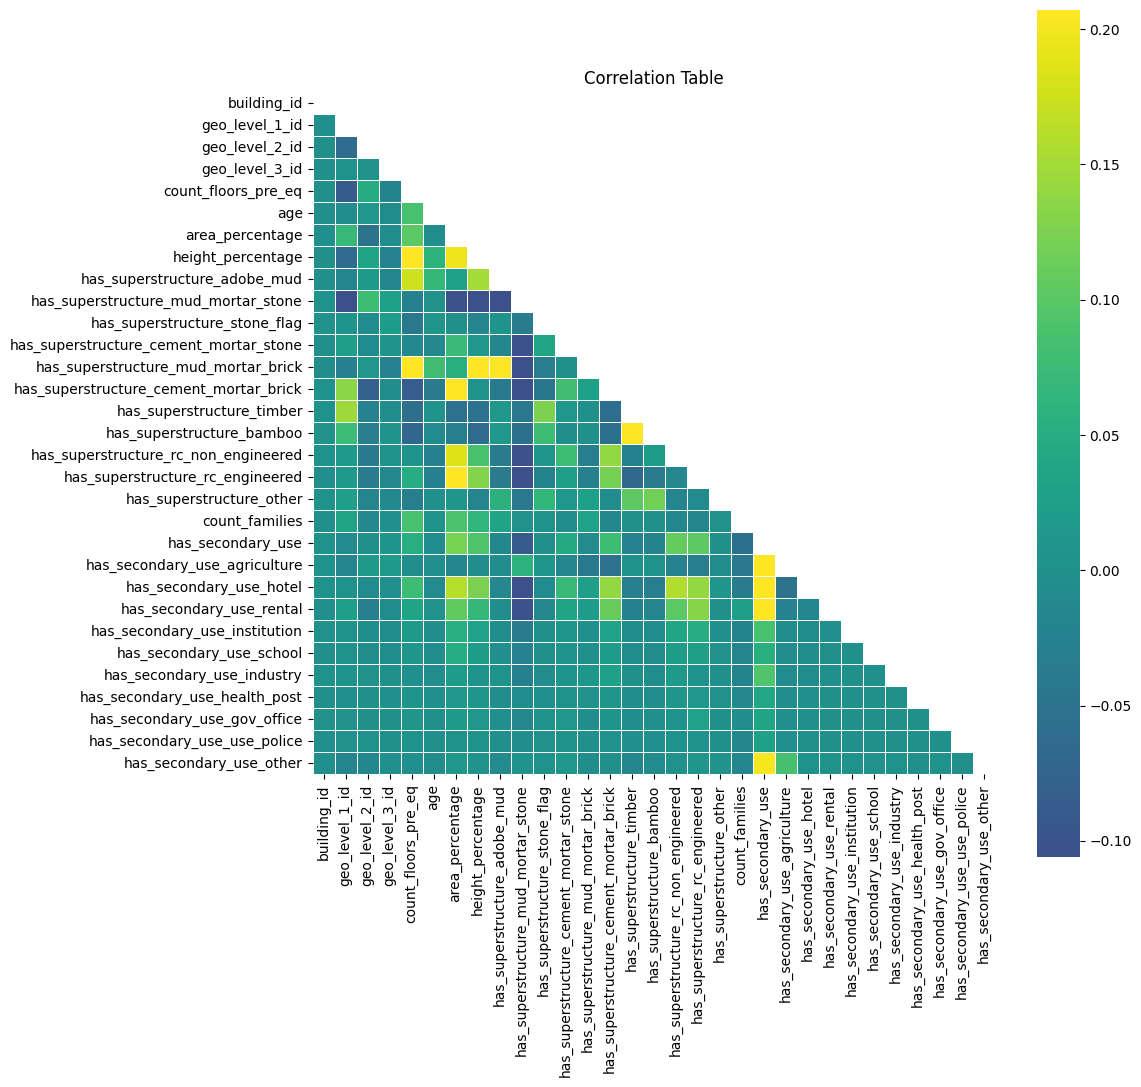

In [57]:
plt.figure(figsize=(11, 11))
corr = numeric_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask = mask, robust = True, center = 0, square = True, cmap = 'viridis', linewidths = 0.6)
plt.title('Correlation Table')
plt.show()